<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_F_Section_20_1%2C_20_2%2C_20_3%2C_20_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Differentiation

In various engineering and scientific scenarios, systems exhibit alterations across dimensions such as time and space. In mathematical modeling, function derivatives serve to capture these alterations. Yet, situations arise where the function isn't directly ascertainable, or it's represented implicitly through a dataset. In such instances, it becomes advantageous to calculate derivatives numerically rather than analytically.

### Finite Difference Approximation and Error Analysis:

Finite difference approximation provides a practical method for estimating derivatives, essential for understanding the behavior of functions in various contexts such as engineering and science. Here, we discuss three common finite difference formulas and their associated errors:

1. **Forward Difference:**
   The forward difference formula estimates the derivative at $x_j$ using neighboring points:
   $$ f'(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j} $$

   **Derivation from Taylor Series:**
   By expanding the function around $x_j$ and considering the leading term, we get:
   $$ f(x_{j+1}) \approx f(x_j) + f'(x_j)(x_{j+1} - x_j) $$
   Rearranging terms yields the forward difference formula.

   **Error Analysis:**
   The forward difference has an error term of $O(h)$, where $h$ is the step size.

2. **Backward Difference:**
   The backward difference formula estimates the derivative at $x_j$ using neighboring points:
   $$ f'(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}} $$

   **Derivation from Taylor Series:**
   Expanding the function around $x_j$ in the opposite direction gives:
   $$ f(x_j) \approx f(x_{j-1}) + f'(x_j)(x_j - x_{j-1}) $$
   Solving for $f'(x_j)$ leads to the backward difference formula.

   **Error Analysis:**
   Similar to the forward difference, the error of the backward difference is $O(h)$.

3. **Central Difference:**
   The central difference formula estimates the derivative at $x_j$ using neighboring points:
   $$ f'(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}} $$

   **Derivation from Taylor Series:**
   Expanding the function around $x_{j+1}$ and $x_{j-1}$ simultaneously gives:
   $$ f(x_{j+1}) = f(x_j) + f'(x_j)(x_{j+1} - x_j) + \frac{1}{2} f''(x_j)(x_{j+1} - x_j)^2 + \cdots $$
   $$ f(x_{j-1}) = f(x_j) + f'(x_j)(x_j - x_{j-1}) + \frac{1}{2} f''(x_j)(x_j - x_{j-1})^2 + \cdots $$
   Subtracting the second equation from the first and solving for $f'(x_j)$ leads to the central difference formula.

   **Error Analysis:**
   The central difference exhibits an error term of $O(h^2)$, offering higher accuracy compared to forward and backward differences.

4. **Higher Order Approximations:**
    Depending on data availability one can also do more computationally expensive, but more accurate, higher order approximations:

    **Derivation from Taylor Series:**

$$
f(x) = f(x_j) + (x - x_j) f'(x_j) + \frac{(x - x_j)^2}{2!} f''(x_j) + \frac{(x - x_j)^3}{3!} f'''(x_j) + \frac{(x - x_j)^4}{4!} f''''(x_j) + \cdots
$$

Now, let's compute the series at $ x = x_j - 2, x_j - 1, x_j + 1, $ and $ x_j + 2 $:

$$
\begin{align*}
f(x_{j - 2}) & = f(x_j) - 2hf'(x_j) + 4h^2\frac{f''(x_j)}{2!} - 8h^3\frac{f'''(x_j)}{3!} + 16h^4\frac{f''''(x_j)}{4!} - 32h^5\frac{f'''''(x_j)}{5!} + \cdots \\
f(x_{j - 1}) & = f(x_j) - hf'(x_j) + h^2\frac{f''(x_j)}{2!} - h^3\frac{f'''(x_j)}{3!} + h^4\frac{f''''(x_j)}{4!} - h^5\frac{f'''''(x_j)}{5!} + \cdots \\
f(x_{j + 1}) & = f(x_j) + hf'(x_j) + h^2\frac{f''(x_j)}{2!} + h^3\frac{f'''(x_j)}{3!} + h^4\frac{f''''(x_j)}{4!} + h^5\frac{f'''''(x_j)}{5!} + \cdots \\
f(x_{j + 2}) & = f(x_j) + 2hf'(x_j) + 4h^2\frac{f''(x_j)}{2!} + 8h^3\frac{f'''(x_j)}{3!} + 16h^4\frac{f''''(x_j)}{4!} + 32h^5\frac{f'''''(x_j)}{5!} + \cdots \\
\end{align*}
$$

Now, to get the $ h^2, h^3, $ and $ h^4 $ terms to cancel out, we can compute:

$$
f(x_{j - 2}) - 8f(x_{j - 1}) + 8f(x_{j + 1}) - f(x_{j + 2}) = \frac{12hf'(x_j) - 48h^5\frac{f'''''(x_j)}{5!}}{120}
$$

Which can be rearranged to:

$$
f'(x_j) = \frac{f(x_{j - 2}) - 8f(x_{j - 1}) + 8f(x_{j + 1}) - f(x_{j + 2})}{12h} + O(h^4)
$$

This formula provides a better approximation for the derivative at $ x_j $ than the central difference formula, with an error term of $ O(h^4) $, but it requires about twice as many calculations.


### Conclusion:

Taylor series expansion serves as a fundamental tool for deriving finite difference formulas, providing insights into their accuracy and error behavior. While forward and backward differences have linear error terms ($O(h)$), the central difference offers superior accuracy with a quadratic error term ($O(h^2)$). And as expected you can gain higher accuracy on the derivative with more data, as shown in the higher order taylor.

Below we show a comparison of the 4 approximation schemes shown:

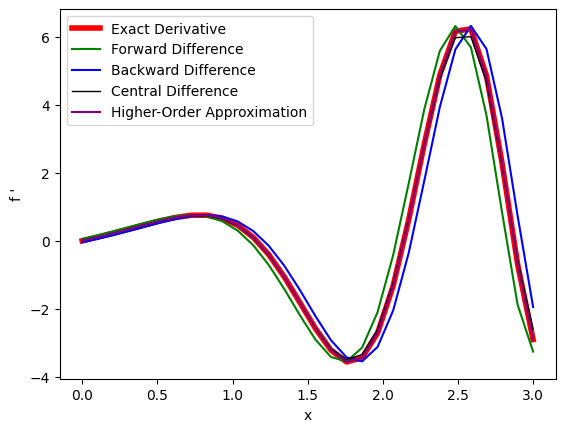

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x**2) + x**3/10 + np.cos(x)

# Define the derivative of the function
def f_prime(x):
    return 2*x*np.cos(x**2) + 3*x**2/10 - np.sin(x)

# Define the spacing of data
h = 0.1

# Define the range of x values for plotting
x_values = np.linspace(0, 3, int(3/h))
y_values = f(x_values)

# Compute the exact derivative
exact_derivative = f_prime(x_values)

# Compute forward difference approximation
forward_diff = (f(x_values + h) - f(x_values)) / h

# Compute backward difference approximation
backward_diff = (f(x_values) - f(x_values - h)) / h

# Compute central difference approximation
central_diff = (f(x_values + h) - f(x_values - h)) / (2 * h)

# Compute higher-order approximation
higher_order_approx = (f(x_values - 2*h) - 8*f(x_values - h) + 8*f(x_values + h) - f(x_values + 2*h)) / (12 * h)

# Plot the derivative and approximations
plt.plot(x_values, exact_derivative, color='red', label='Exact Derivative', linewidth = 4)
plt.plot(x_values, forward_diff, color='green', label='Forward Difference')
plt.plot(x_values, backward_diff, color='blue', label='Backward Difference')
plt.plot(x_values, central_diff, color='k', label='Central Difference', linewidth = 1)
plt.plot(x_values, higher_order_approx, color='purple', label='Higher-Order Approximation')
plt.xlabel("x")
plt.ylabel("f '")
plt.legend()

### Approximating Higher Order Derivatives:

Taylor series expansion can also be employed to approximate higher-order derivatives (e.g., $ f''(x_j), f'''(x_j) $, etc.). For instance, considering the Taylor series expansion around $ a = x_j $ and computing it at $ x = x_{j-1} $ and $ x_{j+1} $ gives:

$$ f(x_{j-1}) = f(x_j) - hf'(x_j) + \frac{h^2}{2}f''(x_j) - \frac{h^3}{6}f'''(x_j) + \cdots $$

$$ f(x_{j+1}) = f(x_j) + hf'(x_j) + \frac{h^2}{2}f''(x_j) + \frac{h^3}{6}f'''(x_j) + \cdots $$

Adding these two equations together, we obtain:

$$ f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + \frac{h^2}{2}f''(x_j) + \frac{h^4}{24}f''''(x_j) + \cdots $$

With some rearrangement, we arrive at the approximation:

$$ f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2} $$

This approximation is $ O(h^2) $, indicating second-order accuracy.

This process can be contued for higher order derivative:

$$
\begin{align*}
f(x_0+h) &= f(x_0) + f'(x_0)h + \frac{f''(x_0)h^2}{2} + \frac{f'''(x_0)h^3}{6} + \frac{f^{(4)}(x_0)h^4}{24} + \cdots \\
f(x_0-h) &= f(x_0) - f'(x_0)h + \frac{f''(x_0)h^2}{2} - \frac{f'''(x_0)h^3}{6} + \frac{f^{(4)}(x_0)h^4}{24} - \cdots \\
f(x_0+2h) &= f(x_0) + 2f'(x_0)2h + 2\frac{f''(x_0)(2h)^2}{2} + \frac{f'''(x_0)(2h)^3}{6} + \frac{f^{(4)}(x_0)(2h)^4}{24} + \cdots \\
f(x_0-2h) &= f(x_0) - 2f'(x_0)2h + 2\frac{f''(x_0)(2h)^2}{2} - \frac{f'''(x_0)(2h)^3}{6} + \frac{f^{(4)}(x_0)(2h)^4}{24} - \cdots
\end{align*}
$$

By adding and subtracting these equations suitably, we can eliminate $ f(x_0) $ and $ f'(x_0) $ to obtain:

$$
f(x_0+2h) - f(x_0-2h) - 2[f(x_0+h) - f(x_0-h)] = \frac{f'''(x_0)2h^3}{3} + \cdots
$$

where $ \xi $ lies between $ \xi_1 $ and $ \xi_4 $.

Thus, we can express $ f'''(x_0) $ as:

$$
f'''(x_0) \approx \frac{1}{12h^3}[f(x_0+2h) - f(x_0-2h) - 2[f(x_0+h) - f(x_0-h)]]
$$

We compute these numerically and compare respectively:

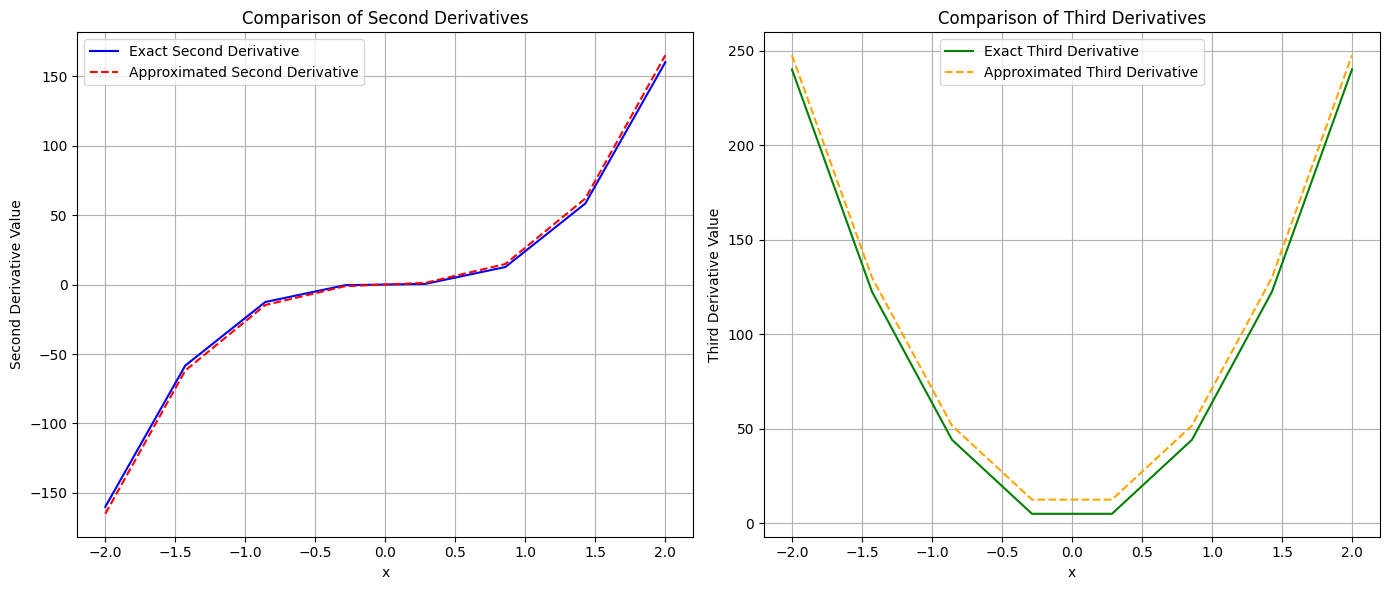

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**5

# Define the second derivative approximation
def second_derivative_approx(x_values, h):
    return (f(x_values + h) - 2*f(x_values) + f(x_values - h)) / (h**2)

# Define the third derivative approximation
def third_derivative_approx(x_values, h):
    return (1 / (2*h**3)) * (f(x_values + 2*h) - f(x_values - 2*h) - 2 * (f(x_values + h) - f(x_values - h)))

# Define the range of x values for computation
h = 0.5
x_values = np.linspace(-2, 2, int(4/h))


# Compute the exact second and third derivatives
exact_second_derivative = 20 * x_values**3
exact_third_derivative = 60*x_values**2

# Compute the approximations
second_derivative = second_derivative_approx(x_values, h)
third_derivative = third_derivative_approx(x_values, h)

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the second derivative
axs[0].plot(x_values, exact_second_derivative, label='Exact Second Derivative', color='blue')
axs[0].plot(x_values, second_derivative, label='Approximated Second Derivative', linestyle='--', color='red')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Second Derivative Value')
axs[0].set_title('Comparison of Second Derivatives')
axs[0].grid(True)
axs[0].legend()

# Plot the third derivative
axs[1].plot(x_values, exact_third_derivative, label='Exact Third Derivative', color='green')
axs[1].plot(x_values, third_derivative, label='Approximated Third Derivative', linestyle='--', color='orange')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Third Derivative Value')
axs[1].set_title('Comparison of Third Derivatives')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()